In [281]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [282]:
#Set unchanging variables for everything
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
large_schools = ['Alabama', 'Auburn', 'Florida', 'Georgia', 'LSU', 'Michigan', 'Notre Dame', 'Ohio State', 'Oklahoma', 'Oregon', 'Penn State', 'Texas', 'USC', 'Wisconsin']
medium_schools = ['Arizona', 'Arizona State', 'Arkansas', 'Boston College', 'BYU', 'California', 'Clemson', 'Colorado', 'Florida State', 'Georgia Tech', 'Iowa', 'Iowa State', 'Kansas', 'Kansas State', 'Kentucky', 'Louisville', 'Maryland', 'Miami', 'Michigan State', 'Minnesota', 'Mississippi State', 'Missouri', 'Nebraska', 'North Carolina', 'North Carolina State', 'Northwestern', 'Oklahoma State', 'Oregon State', 'Pittsburgh', 'Purdue', 'Rutgers', 'South Carolina', 'Stanford', 'Syracuse', 'TCU', 'Tennessee', 'Texas A&M', 'Texas Tech', 'UCLA', 'Utah', 'Virginia', 'Virginia Tech', 'Washington', 'Washington State', 'West Virginia']
small_schools = ['Air Force', 'Akron', 'Appalachian State', 'Arkansas State', 'Army', 'Ball State', 'Boise State', 'Bowling Green', 'Buffalo', 'Central Michigan', 'Charlotte', 'Cincinnati', 'Coastal Carolina', 'Colorado State', 'Connecticut', 'Duke', 'Eastern Michigan', 'East Carolina', 'Florida Atlantic', 'Florida International', 'Fresno State', 'Georgia Southern', 'Georgia State', 'Hawaii', 'Houston', 'Illinois', 'Indiana', 'Kent State', 'Liberty', 'Louisiana', 'Louisiana Tech', 'Louisiana-Monroe', 'Marshall', 'Memphis', 'Miami (OH)', 'Middle Tennessee', 'Navy', 'Nevada', 'New Mexico', 'New Mexico State', 'North Texas', 'Northern Illinois', 'Ohio', 'Old Dominion', 'Rice', 'San Diego State', 'San Jose State', 'SMU', 'South Alabama', 'South Florida', 'Southern Miss', 'Temple', 'Texas State', 'Toledo', 'Troy', 'Tulane', 'Tulsa', 'UAB', 'UCF', 'UNLV', 'UTEP', 'UTSA', 'UTah State', 'UTah State', 'Western Kentucky', 'Western Michigan', 'Wyoming']

all_schools = large_schools + medium_schools + small_schools


colleges = all_schools

In [283]:
#Load all college receiving data
#data/college_receiver_data/{college}/cfbd_receiving_data_{year}.csv')
#pandas dataframe for all college receiving data
all_college_receiving = pd.DataFrame()

for college in colleges:
    for year in years:
        #Check if file is empty
        try:
            temp_data = pd.read_csv(f'data/college_reciever_data/{college}/cfbd_recieving_data_{year}.csv')
        except:
            #print(f'No data for {college} {year}')
            continue
        #print(f'Loading data for {college} {year}')
        #load the data
        temp_data = pd.read_csv(f'data/college_reciever_data/{college}/cfbd_recieving_data_{year}.csv')
        #add the year and college columns
        temp_data['year'] = year
        temp_data['college'] = college
        #append the data to the all college receiving data
        all_college_receiving = pd.concat([all_college_receiving, temp_data])

all_college_receiving.head()


#Combine playerId rows, make statType columns
all_college_receiving = all_college_receiving.pivot_table(index=['playerId','player','college','conference','year'], columns='statType', values='stat').reset_index()
all_college_receiving.head()

#print(all_college_receiving.count())

#Change year to years in college and count how many years each player played
all_college_receiving['years_in_college'] = all_college_receiving.groupby('playerId')['year'].transform('count')
all_college_receiving.head()

#Sum LONG, REC, TD, YDS, YPR for each player, and keep all columns still in the dataframe
all_college_receiving['LONG'] = all_college_receiving['LONG'].fillna(0)
all_college_receiving['REC'] = all_college_receiving['REC'].fillna(0)
all_college_receiving['TD'] = all_college_receiving['TD'].fillna(0)
all_college_receiving['YDS'] = all_college_receiving['YDS'].fillna(0)
all_college_receiving['YPR'] = all_college_receiving['YPR'].fillna(0)
all_college_receiving['LONG'] = all_college_receiving['LONG'].astype(int)
all_college_receiving['REC'] = all_college_receiving['REC'].astype(int)
all_college_receiving['TD'] = all_college_receiving['TD'].astype(int)
all_college_receiving['YDS'] = all_college_receiving['YDS'].astype(int)
all_college_receiving['YPR'] = all_college_receiving['YPR'].astype(int)

all_college_receiving = all_college_receiving.groupby('playerId').agg({'playerId':'first','player':'first','college':'first', 'conference':'first','LONG':'sum','REC':'sum','TD':'sum','YDS':'sum','YPR':'sum','years_in_college':'max'}).reset_index(drop=True)

#change player to player_name
all_college_receiving = all_college_receiving.rename(columns={'player':'player_name'})

#Sort by highest YDS
all_college_receiving = all_college_receiving.sort_values(by='YDS', ascending=False).reset_index(drop=True)

all_college_receiving.head()
    

statType,playerId,player_name,college,conference,LONG,REC,TD,YDS,YPR,years_in_college
0,545923,Corey Davis,Western Michigan,Mid-American,300,332,52,5285,63,4
1,505407,Justin Hardy,East Carolina,American Athletic,244,387,35,4541,45,4
2,3122449,James Washington,Oklahoma State,Big 12,320,226,39,4472,75,4
3,552940,Zay Jones,East Carolina,American Athletic,213,397,23,4264,41,4
4,552775,Taywan Taylor,Western Kentucky,Conference USA,278,253,41,4234,62,4


In [284]:
all_college_draft = pd.DataFrame()

for college in colleges:
    for year in years:
        #Check if file is empty
        try:
            temp_data = pd.read_csv(f'data/draft_data/{college}/cfbd_draft_data_{year}.csv')
        except:
            #print(f'No data for {college} {year}')
            continue
        #print(f'Loading data for {college} {year}')
        #load the data
        temp_data = pd.read_csv(f'data/draft_data/{college}/cfbd_draft_data_{year}.csv')
        #add the year and college columns
        temp_data['draftYear'] = year
        temp_data['college'] = college
        #append the data to the all college receiving data
        all_college_draft = pd.concat([all_college_draft, temp_data])

#Show player named Justin Jefferson
#all_college_draft[all_college_draft['name'] == 'Justin Jefferson']
#all_college_draft.count()
#Combine all_college_draft and all_college_receiving based on player and name, and playerId and collegeAthleteId
all_college_data = pd.merge(all_college_receiving, all_college_draft, left_on=['playerId','college'], right_on=['collegeAthleteId','college'], how='inner')

#Print all columns
#all_college_data.columns

#Move 'name' column to the front
all_college_data = all_college_data[['name', 'playerId','nflAthleteId', 'college', 'nflTeam', 'conference', 'LONG', 'REC', 'TD', 'YDS', 'YPR', 'years_in_college', 'draftYear', 'draftYear', 'position', 'height', 'weight', 'round', 'pick', 'overall', 'preDraftRanking','preDraftPositionRanking','preDraftGrade','hometownInfo']]
#print justin jefferson
#all_college_data[all_college_data['name'] == 'Justin Jefferson']
#Add column which states how big the school is
all_college_data['school_size'] = 'small'
all_college_data.loc[all_college_data['college'].isin(medium_schools), 'school_size'] = 'medium'
all_college_data.loc[all_college_data['college'].isin(large_schools), 'school_size'] = 'large'

#Move school_size column to be after college column
all_college_data = all_college_data[['name', 'playerId', 'nflAthleteId', 'college', 'school_size', 'nflTeam', 'conference', 'LONG', 'REC', 'TD', 'YDS', 'YPR', 'years_in_college', 'draftYear', 'draftYear', 'position', 'height', 'weight', 'round', 'pick', 'overall', 'preDraftRanking','preDraftPositionRanking','preDraftGrade','hometownInfo']]


all_college_data[all_college_data['name'] == 'Justin Jefferson']



,name,playerId,nflAthleteId,college,school_size,nflTeam,conference,LONG,REC,TD,...,position,height,weight,round,pick,overall,preDraftRanking,preDraftPositionRanking,preDraftGrade,hometownInfo
79,Justin Jefferson,4262921,104360,LSU,large,Minnesota,SEC,136,165,24,...,Wide Receiver,73.0,202.0,1,22,22,14.0,4.0,91.0,"{'city': 'Saint Rose', 'state': 'LA', 'country..."


In [ ]:
#Graph number of wide receivers drafted from each school by school size
plt.figure(figsize=(15, 10))
sns.countplot(y='college', data=all_college_data, order = all_college_data['college'].value_counts().index, hue='school_size')
plt.title('Number of Drafted Wide Receiver Players from Each School by School Size')
plt.xlabel('Number of Players Drafted')
plt.ylabel('School')
plt.show()

#Graph pi chart of number of wide receivers drafted by school size
plt.figure(figsize=(15, 10))
all_college_data['school_size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Drafted Wide Receiver Players by School Size')
plt.ylabel('')
plt.show()


#Print the number of players drafted from each school size
print(all_college_data['school_size'].value_counts())



In [ ]:
#bar plot y being school size, x being number of players drafted
plt.figure(figsize=(15, 10))
sns.countplot(x='school_size', data=all_college_data)
plt.title('Number of Drafted Wide Receiver Players from Each School Size')
plt.xlabel('School Size')
plt.ylabel('Number of Players Drafted')
plt.show()


In [287]:
all_nfl_data = pd.DataFrame()

for year in years:
    temp_data = pd.read_csv(f'data/nfl_recieving_data/cfbd_recieving_data_{year}.csv')
    temp_data['year'] = year
    all_nfl_data = pd.concat([all_nfl_data, temp_data])



#Rename columns
all_nfl_data = all_nfl_data.rename(columns={'Player':'name', 'Rec':'nfl_REC', 'Yds':'nfl_YDS', 'TD':'nfl_TD', 'LNG':'nfl_LNG', 'Rec FUM':'nfl_Rec_FUM','Rec YAC/R':'nfl_Rec_YAC/R','Tgts':'nfl_TGTS', 'year':'nfl_Year'})

#combine rows with the same player name, and sum all other columns, change year to years in nfl
all_nfl_data = all_nfl_data.groupby('name').agg({'name':'first','nfl_REC':'sum','nfl_YDS':'sum','nfl_TD':'sum','nfl_LNG':'max','nfl_Rec_FUM':'sum','nfl_Rec_YAC/R':'mean','nfl_TGTS':'sum','nfl_Year':'count'}).reset_index(drop=True)

#Rename nfl_year to years_in_nfl
all_nfl_data = all_nfl_data.rename(columns={'nfl_Year':'years_in_nfl'})

#all_nfl_data.count()

In [288]:
#Combine all_nfl_data and all_college_data based on player_name
all_data = pd.merge(all_college_data, all_nfl_data, on='name', how='inner')

#Print all columns
all_data.columns

#Print everything for Justin Jefferson
all_data[all_data['name'] == 'Justin Jefferson']

all_data.count()


name                       569
playerId                   569
nflAthleteId               569
college                    569
school_size                569
nflTeam                    569
conference                 569
LONG                       569
REC                        569
TD                         569
YDS                        569
YPR                        569
years_in_college           569
draftYear                  569
draftYear                  569
draftYear                  569
draftYear                  569
position                   569
height                     565
weight                     569
round                      569
pick                       569
overall                    569
preDraftRanking            515
preDraftPositionRanking    548
preDraftGrade              548
hometownInfo               569
nfl_REC                    569
nfl_YDS                    569
nfl_TD                     569
nfl_LNG                    569
nfl_Rec_FUM                569
nfl_Rec_

In [ ]:
#Plot graph where x is years in nfl, y is nfl yards, green dots are large schools, blue dots are medium schools, red dots are small schools
plt.figure(figsize=(15, 10))
sns.scatterplot(x='years_in_nfl', y='nfl_YDS', data=all_data, hue='school_size')
plt.title('Years in NFL vs NFL Yards by School Size')
plt.xlabel('Years in NFL')
plt.ylabel('NFL Yards')
plt.show()



#print top 5 players with most nfl td
all_data = all_data.sort_values(by='nfl_YDS', ascending=False).reset_index(drop=True)
all_data.head()


In [ ]:
#bar graph of number of players taken in each round by school size
plt.figure(figsize=(15, 10))
sns.countplot(x='round', data=all_data, hue='school_size')
plt.title('Number of Players Drafted in Each Round by School Size')
plt.xlabel('Round Drafted')
plt.ylabel('Number of Players Drafted')
plt.show()

#Do the same but with pick instead of round
plt.figure(figsize=(15, 10))
sns.countplot(x='pick', data=all_data, hue='school_size')
plt.title('Number of Players Drafted in Each Pick by School Size')
plt.xlabel('Pick Drafted')
plt.ylabel('Number of Players Drafted')
plt.show()



In [ ]:
#graph average amount of yards a player had in the nfl by school size
plt.figure(figsize=(15, 10))
sns.barplot(x='school_size', y='nfl_YDS', data=all_data)
plt.title('Average NFL Yards by School Size')
plt.xlabel('School Size')
plt.ylabel('Average NFL Yards')
plt.show()


In [ ]:
#plot where x is pick number, y is nfl yards, green dots are large schools, blue dots are medium schools, red dots are small schools
plt.figure(figsize=(15, 10))
sns.scatterplot(x='pick', y='nfl_YDS', data=all_data, hue='school_size')
plt.title('Pick Number vs NFL Yards by School Size')
plt.xlabel('Pick Number')
plt.ylabel('NFL Yards')
plt.show()


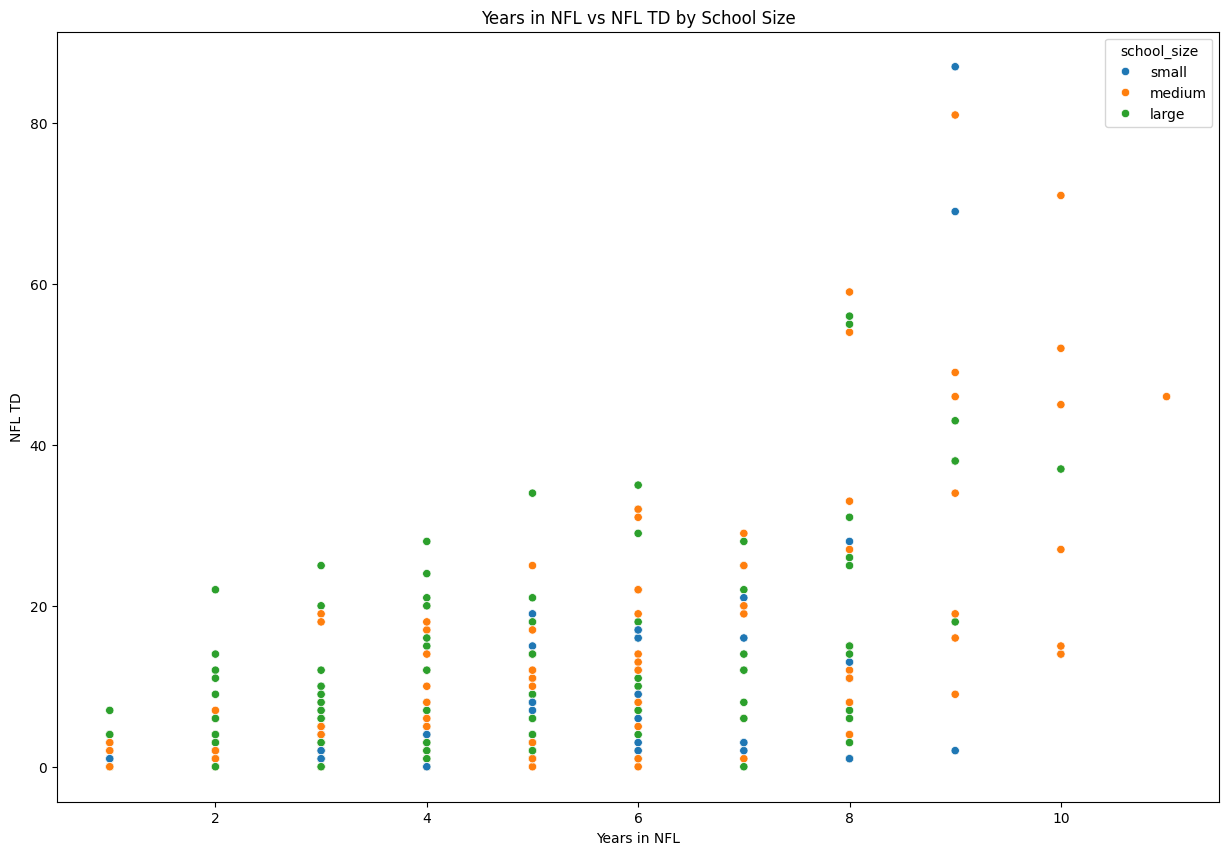

,name,playerId,nflAthleteId,college,school_size,nflTeam,conference,LONG,REC,TD,...,hometownInfo,nfl_REC,nfl_YDS,nfl_TD,nfl_LNG,nfl_Rec_FUM,nfl_Rec_YAC/R,nfl_TGTS,years_in_nfl,player_value
0,Davante Adams,520581,34753,Fresno State,small,Green Bay,Mountain West,164,233,38,...,"{'city': 'Palo Alto', 'state': 'CA', 'country'...",769,9637,87,66,6,407.444444,1191,9,2661.049383
1,Mike Evans,517502,34120,Texas A&M,medium,Tampa Bay,SEC,170,151,17,...,"{'city': 'Galveston', 'state': 'TX', 'country'...",683,10425,81,72,3,229.555556,1188,9,2465.172840
2,DeAndre Hopkins,501689,30261,Clemson,medium,Houston,ACC,112,154,23,...,"{'city': 'Central', 'state': 'SC', 'country': ...",853,11298,71,76,12,300.900000,1371,10,2311.300000
3,Travis Kelce,377964,30133,Cincinnati,small,Kansas City,Big East,113,58,10,...,"{'city': 'Cleveland Heights', 'state': 'OH', '...",814,10344,69,80,12,554.000000,1144,9,2712.444444
4,Stefon Diggs,534249,46918,Maryland,medium,Minnesota,ACC,209,150,14,...,"{'city': 'Gaithersburg', 'state': 'MD', 'count...",703,8812,59,75,8,361.875000,1018,8,2467.093750


In [308]:
#Plot graph where x is years in nfl, y is nfl td, green dots are large schools, blue dots are medium schools, red dots are small schools
plt.figure(figsize=(15, 10))
sns.scatterplot(x='years_in_nfl', y='nfl_TD', data=all_data, hue='school_size')
plt.title('Years in NFL vs NFL TD by School Size')
plt.xlabel('Years in NFL')
plt.ylabel('NFL TD')
plt.show()



#print top 5 players with most nfl td
all_data = all_data.sort_values(by='nfl_TD', ascending=False).reset_index(drop=True)
all_data.head()


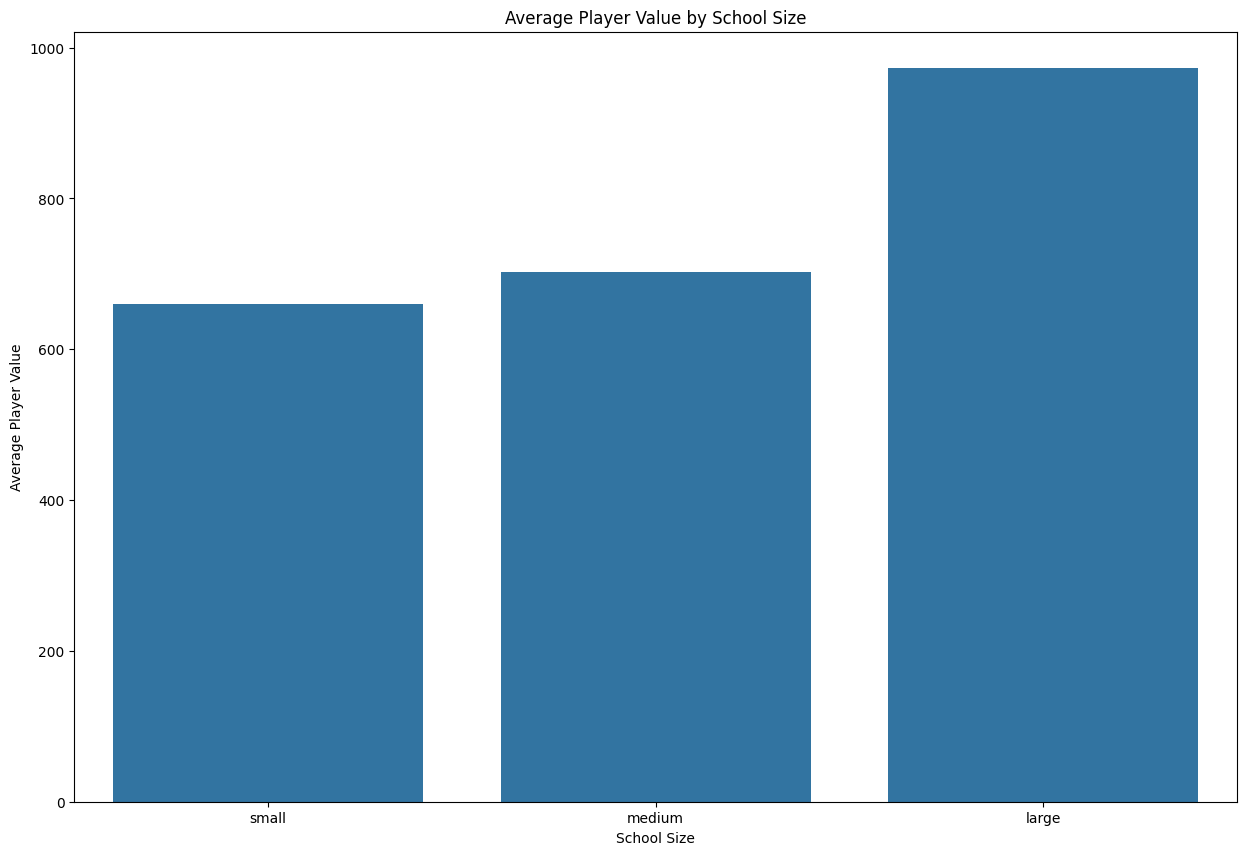

school_size
large     972.377194
medium    702.410007
small     660.591246
Name: player_value, dtype: float64


In [304]:
#score a player value based on reception yards, touchdowns, and receptions
all_data['player_value'] = (all_data['nfl_YDS'] + all_data['nfl_TD']*100 + all_data['nfl_REC']*2 + all_data['nfl_Rec_YAC/R']*10)/all_data['years_in_nfl']

small_value_avg = all_data[all_data['school_size'] == 'small']['player_value'].mean()
medium_value_avg = all_data[all_data['school_size'] == 'medium']['player_value'].mean()
large_value_avg = all_data[all_data['school_size'] == 'large']['player_value'].mean()

#Graph above average values
plt.figure(figsize=(15, 10))
sns.barplot(x=['small', 'medium', 'large'], y=[small_value_avg, medium_value_avg, large_value_avg])
plt.title('Average Player Value by School Size')
plt.xlabel('School Size')
plt.ylabel('Average Player Value')
plt.show()

#Print average player value by school size
print(all_data.groupby('school_size')['player_value'].mean())

